In [12]:
import pandas as pd
import numpy as np

In [13]:
source = "C:/Users/lazni/PycharmProjects/Age_Predictor/source_data/actor_data.txt"
data = pd.read_table(source, sep='\t')

In [14]:
df = pd.DataFrame(data)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11782665 entries, 0 to 11782664
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 539.4+ MB


In [16]:
df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0072308,tt0050419,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0038355,tt0037382,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0054452,tt0049189,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0077975,tt0080455,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"
...,...,...,...,...,...,...
11782660,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt14069590,tt2455546,tt11657662"
11782661,nm9993716,Essias Loberg,\N,\N,NaN,\N
11782662,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
11782663,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [17]:
type(df.iloc[11782660][0])

str

In [18]:
# drop rows with filter (similar like filtering with iloc/loc etc...)
filter_ = df["birthYear"] == '\\N'
df.drop(df[filter_].index, inplace=True)

df.drop(columns=["primaryProfession", "knownForTitles"], inplace=True)

In [19]:
df["birthYear"] = df["birthYear"].astype(int)

In [20]:
# filter_ = df["birthYear"] >= 2004
# df.drop(df[filter_].index, inplace=True)

# filter_ = df["birthYear"] < 1940
# df.drop(df[filter_].index, inplace=True)

df = df[0:400_000]

In [21]:
# df.set_index("nconst", inplace=True)

In [22]:
df["deathYear"] = np.where(df["deathYear"] == "\\N", 2022, df["deathYear"])
df["deathYear"] = df["deathYear"].astype(int)

C:\Users\lazni\AppData\Local\Temp\ipykernel_2596\1307274600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["deathYear"] = np.where(df["deathYear"] == "\\N", 2022, df["deathYear"])
C:\Users\lazni\AppData\Local\Temp\ipykernel_2596\1307274600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["deathYear"] = df["deathYear"].astype(int)


In [23]:
df["currentAge"] = df["deathYear"] - df["birthYear"]
filter_ = df["currentAge"] < 20 
df.drop(df[filter_].index, inplace=True)

filter_ = df["currentAge"] > 27 
df.drop(df[filter_].index, inplace=True)

C:\Users\lazni\AppData\Local\Temp\ipykernel_2596\2678159501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["currentAge"] = df["deathYear"] - df["birthYear"]
C:\Users\lazni\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8504 entries, 14 to 5503003
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nconst       8504 non-null   object
 1   primaryName  8504 non-null   object
 2   birthYear    8504 non-null   int32 
 3   deathYear    8504 non-null   int32 
 4   currentAge   8504 non-null   int32 
dtypes: int32(3), object(2)
memory usage: 299.0+ KB


In [25]:
df.head()

,nconst,primaryName,birthYear,deathYear,currentAge
14,nm0000015,James Dean,1931,1955,24
202,nm0000203,River Phoenix,1970,1993,23
604,nm0000605,Brad Renfro,1982,2008,26
636,nm0000637,Tupac Shakur,1971,1996,25
968,nm0000970,Jonathan Brandis,1976,2003,27


In [26]:
df["currentAge"].describe()

count    8504.000000
mean       24.038452
std         2.200585
min        20.000000
25%        22.000000
50%        24.000000
75%        26.000000
max        27.000000
Name: currentAge, dtype: float64

In [27]:
df.sort_values(by="currentAge", ascending=True)[0:100]

,nconst,primaryName,birthYear,deathYear,currentAge
3133908,nm12312711,Mai Hirayama,2002,2022,20
854480,nm0907628,Christy Walker,1898,1918,20
3774954,nm12988705,Md Rajjab Ali,2002,2022,20
3779081,nm1299295,Prins Felix,2002,2022,20
859035,nm0912474,Gloria Warner,1914,1934,20
...,...,...,...,...,...
3911812,nm13133005,Ricardo Ervey,2002,2022,20
4854541,nm1688524,Bradley Pickren,2002,2022,20
916996,nm0994226,Adam,1979,1999,20
1764679,nm10895077,Ikaro Silvester Teixeira da Silva,2002,2022,20


In [28]:
print(df.iloc[0][0], df.iloc[0][-1])
print(df.iloc[1][0], df.iloc[1][-1])

nm0000015 24
nm0000203 23


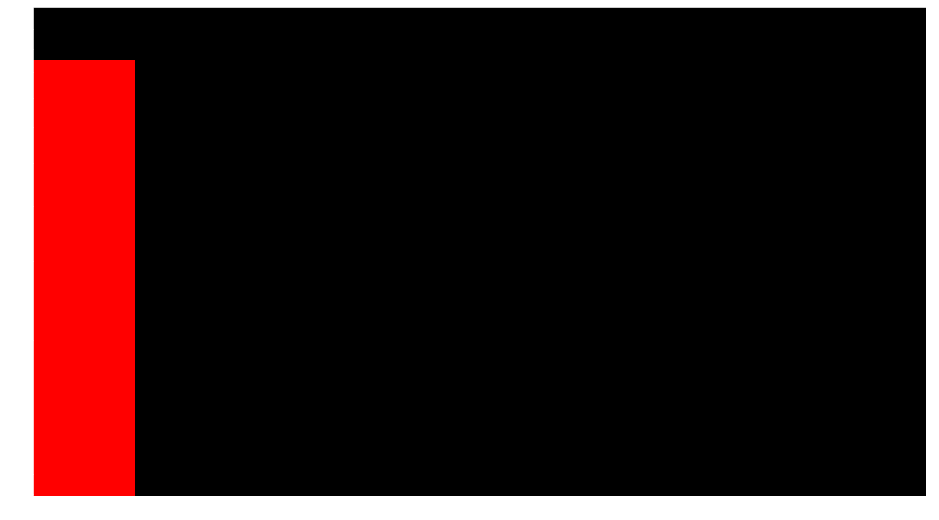

In [29]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.figure(figsize=(16,9))
plt.hist(df["currentAge"], color="red", bins=[20, 28, 36, 45, 56, 66, 82])
plt.yscale("log")
plt.xlim(20, 90)
plt.show()

In [33]:
df.to_csv("C:/Users/lazni/PycharmProjects/Age_Predictor/source_data/source_data_0.csv")